# Data Notes

- finalLink and link contain notes to the website, we may look at them.

In [33]:
import pandas as pd
import numpy as np

In [89]:
date_cols = ["date", "acceptedDate", "fillingDate"]
d = pd.read_csv("raw_data_finance.csv", delimiter=";", parse_dates=date_cols, low_memory=False)

In [92]:
d.groupby(["year", "period"]).apply(period)

NameError: name 'period' is not defined

In [13]:
date_cols = ["date", "acceptedDate", "fillingDate"]
df = pd.read_csv("raw_data_finance.csv", delimiter=";", parse_dates=date_cols, low_memory=False).iloc[:, 1:]
df = df.replace("missing", np.nan)

# set index on symbol datetime
df.set_index(["date", "symbol"], inplace=True)

# Drop duplicates on index
df = df[~df.index.duplicated(keep='first')]


In [14]:
df.select_dtypes(include="object")

,,finalLink,link,period,reportedCurrency,othertotalStockholdersEquity,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowCoverageRatios,cashFlowToDebtRatio,...,estimatedEpsAvg,estimatedEpsHigh,estimatedEpsLow,estimatedNetIncomeAvg,estimatedNetIncomeHigh,estimatedNetIncomeLow,estimatedSgaExpenseAvg,estimatedSgaExpenseHigh,estimatedSgaExpenseLow,volume
date,symbol,,,,,,,,,,,,,,,,,,,,,
1995-01-31,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-03-31,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-06-30,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-09-30,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-31,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,SGRE.MC,NaN,NaN,Q3,EUR,5197333000.0,0.1721457866248712,-3.9606682832417524,-47.96487532697272,0.4107165184925784,0.4107165184925784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147808.8
2022-01-31,SGRE.MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1747711.4
2022-03-31,SGRE.MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
non_prep_cols = []
for col in df.select_dtypes(include="object").columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [22]:
df[non_prep_cols]

,,finalLink,link,period,reportedCurrency,rating,ratingDetailsDCFRecommendation,ratingDetailsDERecommendation,ratingDetailsPBRecommendation,ratingDetailsPERecommendation,ratingDetailsROARecommendation,ratingDetailsROERecommendation,ratingRecommendation
date,symbol,,,,,,,,,,,,
1995-01-31,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-03-31,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-06-30,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-09-30,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-31,ALMIL.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,SGRE.MC,NaN,NaN,Q3,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-31,SGRE.MC,NaN,NaN,NaN,NaN,A,Strong Buy,Strong Buy,Strong Buy,Strong Sell,Neutral,Neutral,Buy
2022-03-31,SGRE.MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df.shape

(210224, 290)

In [13]:
df.estimatedSgaExpenseLow.isna().sum()/ len(df.estimatedSgaExpenseLow)

0.9479317299642286

# Make date and symbol index

In [126]:
df["date"] = pd.to_datetime(df["date"])
df.set_index(["date", "symbol"], inplace=True)

In [132]:
df[~df.index.duplicated(keep='first')]

,,year,quarter,week,acceptedDate,calendarYear,cik,costAndExpenses,costOfRevenue,depreciationAndAmortization,ebitda,...,estimatedRevenueAvg,estimatedRevenueHigh,estimatedRevenueLow,estimatedSgaExpenseAvg,estimatedSgaExpenseHigh,estimatedSgaExpenseLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps,close,volume
date,symbol,,,,,,,,,,,,,,,,,,,,,
1995-01-31,ALMIL.PA,1995,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-03-31,ALMIL.PA,1995,3,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-06-30,ALMIL.PA,1995,6,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-09-30,ALMIL.PA,1995,9,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-31,ALMIL.PA,1996,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,SGRE.MC,2021,9,39,2021-09-30,2021.0,NaN,3.141146e+09,2.970049e+09,202139000.0,-69191000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.082,1147808.8
2022-01-31,SGRE.MC,2022,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.374,1747711.4
2022-03-31,SGRE.MC,2022,3,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# nan values
df.groupby(level=0).apply(lambda x:x.isna().sum()/ len(x))

,year,quarter,week,acceptedDate,calendarYear,cik,costAndExpenses,costOfRevenue,depreciationAndAmortization,ebitda,...,estimatedRevenueAvg,estimatedRevenueHigh,estimatedRevenueLow,estimatedSgaExpenseAvg,estimatedSgaExpenseHigh,estimatedSgaExpenseLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps,close,volume
symbol,,,,,,,,,,,,,,,,,,,,,
0O9.F,0.0,0.0,0.0,0.883929,0.883929,0.883929,0.883929,0.883929,0.883929,0.883929,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.883929,0.883929
0QF.F,0.0,0.0,0.0,0.893805,0.893805,0.893805,0.893805,0.893805,0.893805,0.893805,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.876106,0.876106
217A.F,0.0,0.0,0.0,0.681416,0.681416,0.681416,0.681416,0.681416,0.681416,0.681416,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.814159,0.814159
22UA.F,0.0,0.0,0.0,0.797386,0.797386,0.797386,0.797386,0.797386,0.797386,0.797386,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.673203,0.673203
2CRSI.PA,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.776000,0.776000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XIOR.BR,0.0,0.0,0.0,0.954887,0.954887,0.954887,0.954887,0.954887,0.954887,0.954887,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.691729,0.691729
YATRA.AS,0.0,0.0,0.0,0.526786,0.526786,0.526786,0.526786,0.526786,0.526786,0.526786,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.821429,0.821429
YK6B.F,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.955357,0.955357


In [1]:
import Preprocessing as pr
df = pr.get_data()

/Users/kaancaylan/Desktop/HEC/DataProjectQuinten-StockPrediction/quinten-stock-prediction/Preprocessing.py:8: DtypeWarning: Columns (8,17,26,33,34,66,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,252,253,255,257,259,261,263,265,267,269,270,271,272,273,274,275,276,277,278,279,280,284,285,286,290) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, delimiter=";", parse_dates=date_cols).iloc[:, 1:]


In [2]:
df

,,year,quarter,week,acceptedDate,calendarYear,cik,costAndExpenses,costOfRevenue,depreciationAndAmortization,ebitda,...,estimatedRevenueAvg,estimatedRevenueHigh,estimatedRevenueLow,estimatedSgaExpenseAvg,estimatedSgaExpenseHigh,estimatedSgaExpenseLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps,close,volume
date,symbol,,,,,,,,,,,,,,,,,,,,,
1995-01-31,ALMIL.PA,1995,1,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-03-31,ALMIL.PA,1995,3,13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-06-30,ALMIL.PA,1995,6,26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-09-30,ALMIL.PA,1995,9,39,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-31,ALMIL.PA,1996,1,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,SGRE.MC,2021,9,39,2021-09-30,2021.0,NaN,3.141146e+09,2.970049e+09,202139000.0,-69191000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.082,1147808.8
2022-01-31,SGRE.MC,2022,1,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.374,1747711.4
2022-03-31,SGRE.MC,2022,3,13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Construct Target
 Target is the return of the asset calculated from close price

In [3]:
df["return"] = df["close"].groupby(level="symbol", group_keys=False).apply(lambda x: x.pct_change())

<Axes: >

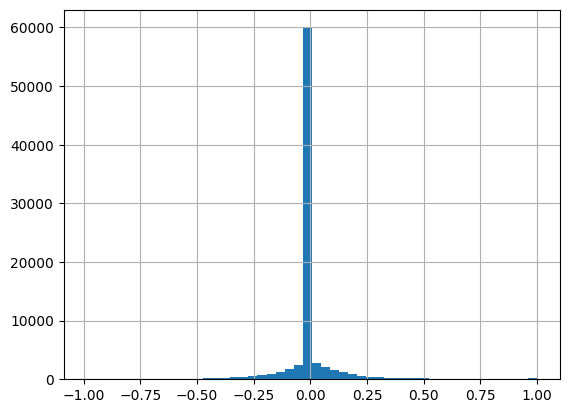

In [28]:
df["return"].clip(upper=1).hist(bins=50)

In [29]:
# highest returns
df["return"].nlargest(20)

symbol    date      
PFRM3.SA  2020-03-31    23.649258
ALTTI.PA  2017-09-30    13.142857
NR21.PA   2021-01-31    11.851485
TCH.PA    2020-06-30    11.412844
ALIMO.PA  2020-06-30    10.111111
ALENT.PA  2021-01-31     8.789474
MLHOP.PA  2019-09-30     8.151515
MLJSA.PA  2019-03-31     7.788571
ALNOV.PA  2020-03-31     7.417960
ALACT.PA  2022-01-31     6.611041
MLMON.PA  2022-01-31     6.231579
HY9H.F    2021-01-31     5.852273
ALSGD.PA  2021-01-31     5.823266
ALKLK.PA  2020-01-31     5.409639
MLOCT.PA  2020-06-30     5.031447
FAST.AS   2021-01-31     4.912336
MLDAM.PA  2021-01-31     4.769697
NVV1.F    2020-06-30     4.495522
ALBIO.PA  2020-03-31     4.396505
MLVST.PA  2017-06-30     4.303333
Name: return, dtype: float64

In [30]:
# Lowest Returns
df["return"].nsmallest(20)

symbol    date      
ALCYB.PA  2021-01-31   -0.988523
          2020-01-31   -0.981455
CGGBS.PA  2022-01-31   -0.978210
ALJXR.PA  2022-01-31   -0.974000
ALNEV.PA  2022-01-31   -0.967222
PFRM3.SA  2020-06-30   -0.966738
ALDR.PA   2020-09-30   -0.960757
          2020-01-31   -0.959101
ALDBY.PA  2022-01-31   -0.935065
GENK.BR   2022-01-31   -0.929798
WOLS.BR   2018-03-31   -0.914488
ALALO.PA  2022-01-31   -0.914415
DPA.AS    2021-09-30   -0.910798
ANT.BR    2021-06-30   -0.908869
ML350.PA  2018-01-31   -0.905240
MORE.AS   2019-01-31   -0.903493
WOLE.BR   2018-03-31   -0.895152
FIA1S.HE  2020-03-31   -0.877447
ALEUP.PA  2020-01-31   -0.869972
AVT.PA    2022-01-31   -0.863065
Name: return, dtype: float64

The target must be  

# Time Series Split

In [74]:
from sklearn.model_selection import TimeSeriesSplit

dates = df.index.get_level_values(0).unique().to_series().reset_index(drop=True)

tscv = TimeSeriesSplit(max_train_size=20, test_size=2, n_splits=20)
for i, (train_index, test_index) in enumerate(tscv.split(dates)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
  Test:  index=[72 73]
Fold 1:
  Train: index=[54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73]
  Test:  index=[74 75]
Fold 2:
  Train: index=[56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
  Test:  index=[76 77]
Fold 3:
  Train: index=[58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
  Test:  index=[78 79]
Fold 4:
  Train: index=[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
  Test:  index=[80 81]
Fold 5:
  Train: index=[62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
  Test:  index=[82 83]
Fold 6:
  Train: index=[64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
  Test:  index=[84 85]
Fold 7:
  Train: index=[66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
  Test:  index=[86 87]
Fold 8:
  Train: index=[68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
  Test:  index=[88 89]
Fold 9:
  Train: index=[70 7

# Machine Learning:
- The target variable must be the return of the stock within the test period
- Features must be 

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [12]:
df.index

MultiIndex([('1995-01-31', 'ALMIL.PA'),
            ('1995-03-31', 'ALMIL.PA'),
            ('1995-06-30', 'ALMIL.PA'),
            ('1995-09-30', 'ALMIL.PA'),
            ('1996-01-31', 'ALMIL.PA'),
            ('1996-03-31', 'ALMIL.PA'),
            ('1996-06-30', 'ALMIL.PA'),
            ('1996-09-30', 'ALMIL.PA'),
            ('1997-01-31', 'ALMIL.PA'),
            ('1997-03-31', 'ALMIL.PA'),
            ...
            ('2022-01-31',  'SGRE.MC'),
            ('2022-01-31',  'SGRE.MC'),
            ('2022-01-31',  'SGRE.MC'),
            ('2022-01-31',  'SGRE.MC'),
            ('2022-01-31',  'SGRE.MC'),
            ('2022-01-31',  'SGRE.MC'),
            ('2022-01-31',  'SGRE.MC'),
            ('2022-03-31',  'SGRE.MC'),
            ('2022-06-30',  'SGRE.MC'),
            ('2022-09-30',  'SGRE.MC')],
           names=['date', 'symbol'], length=210224)

symbol
0O9.F       True
0QF.F       True
217A.F      True
22UA.F      True
2CRSI.PA    True
            ... 
XIOR.BR     True
YATRA.AS    True
YK6B.F      True
ZEL.NZ      True
ZEN.BR      True
Name: return, Length: 1407, dtype: bool

In [75]:
from sklearn.model_selection import TimeSeriesSplit

dates = df.index.get_level_values(0).unique().to_series().reset_index(drop=True)

tscv = TimeSeriesSplit(max_train_size=20, test_size=2, n_splits=20)
for i, (train_index, test_index) in enumerate(tscv.split(dates)):
    X = df.loc[dates.loc[train_index]]
    y = df["return"].loc[dates.loc[test_index]]
    
    # find nan stocks
    all_nans = y.groupby(level="symbol").apply(lambda y: y.isna().all())
    if len(all_nans[~all_nans]) == 0:
        continue

    else:
        # filter stocks lower than 1 Euro
        idx = pd.IndexSlice[:, all_nans[~all_nans].index]
        X = X.loc[idx, :]
        y = y.loc[idx]
        test_per_agg_ret = y.groupby(level="symbol").apply(lambda x: (1 + x[0]) * (1 + x[1]) - 1)
        y_agg = y.groupby(level="symbol").apply(lambda x: (1 + x[0]) * (1 + x[1]) - 1)
        # X.join(y_agg.rename("agg_return"), on="symbol")
        break
    
    
    
    

    

In [40]:
X.index.get_level_values(1).isin(all_nans[~all_nans].index)
all_nans[~all_nans].index.isin(X.index.get_level_values(1)).all()

True

In [78]:
X

,,year,quarter,week,acceptedDate,calendarYear,cik,costAndExpenses,costOfRevenue,depreciationAndAmortization,ebitda,...,estimatedRevenueHigh,estimatedRevenueLow,estimatedSgaExpenseAvg,estimatedSgaExpenseHigh,estimatedSgaExpenseLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps,close,volume,return
date,symbol,,,,,,,,,,,,,,,,,,,,,
2012-06-30,217A.F,2012,6,26,2012-06-30,2012.0,NaN,333831000.0,261088000.0,0.0,29923000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-30,217A.F,2012,9,39,2012-09-30,2012.0,NaN,375927000.0,285662000.0,0.0,21860000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31,217A.F,2013,1,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,217A.F,2013,3,13,2013-03-31,2013.0,NaN,411208000.0,319642000.0,0.0,32276000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-30,217A.F,2013,6,26,2013-06-30,2013.0,NaN,444397000.0,347962000.0,0.0,3916000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,ZEN.BR,2016,3,13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,ZEN.BR,2016,6,26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,ZEN.BR,2016,9,39,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
idx = pd.IndexSlice[:, all_nans[~all_nans].index]
X.loc[idx, :].index.get_level_values(1).unique()

Index(['217A.F', '3E2.F', '558.SI', '8GW.IR', 'A17U.SI', 'A3M.MC', 'A5G.IR',
       'A7RU.SI', 'AALB.AS', 'AALR3.SA',
       ...
       'WKL.AS', 'WLN.PA', 'WOLE.BR', 'WOLS.BR', 'XFAB.PA', 'XIL.PA',
       'XIOR.BR', 'YATRA.AS', 'ZEL.NZ', 'ZEN.BR'],
      dtype='object', name='symbol', length=1192)

In [77]:
y_agg = y.groupby(level="symbol").apply(lambda x: (1 + x[0]) * (1 + x[1]) - 1)
X.join(y_agg.rename("agg_return"), on="symbol")

,,year,quarter,week,acceptedDate,calendarYear,cik,costAndExpenses,costOfRevenue,depreciationAndAmortization,ebitda,...,estimatedRevenueLow,estimatedSgaExpenseAvg,estimatedSgaExpenseHigh,estimatedSgaExpenseLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps,close,volume,return,agg_return
date,symbol,,,,,,,,,,,,,,,,,,,,,
2012-06-30,217A.F,2012,6,26,2012-06-30,2012.0,NaN,333831000.0,261088000.0,0.0,29923000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006905
2012-09-30,217A.F,2012,9,39,2012-09-30,2012.0,NaN,375927000.0,285662000.0,0.0,21860000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006905
2013-01-31,217A.F,2013,1,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006905
2013-03-31,217A.F,2013,3,13,2013-03-31,2013.0,NaN,411208000.0,319642000.0,0.0,32276000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006905
2013-06-30,217A.F,2013,6,26,2013-06-30,2013.0,NaN,444397000.0,347962000.0,0.0,3916000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,ZEN.BR,2016,3,13,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070520
2016-06-30,ZEN.BR,2016,6,26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070520
2016-09-30,ZEN.BR,2016,9,39,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070520


In [8]:
# We need one return per stock for the 2 periods (6 months that we keep the stock)

y.index.get_level_values(0).unique()

DatetimeIndex(['2017-06-30', '2017-09-30'], dtype='datetime64[ns]', name='date', freq=None)

- For every stock, drop from analysis if the entire stock contains only nan value for the period.
- For every stock, drop it from analysis if it does not have its return price for the period. 

Idea:
- For each stock, we will have one row. We aggregate all time-series features into a single row.

In [51]:
y.groupby("symbol").apply(lambda x: print(x))

date        symbol
2017-06-30  0O9.F    NaN
2017-09-30  0O9.F    NaN
Name: 0O9.F, dtype: float64
date        symbol
2017-06-30  0QF.F    NaN
2017-09-30  0QF.F    NaN
Name: 0QF.F, dtype: float64
date        symbol
2017-06-30  217A.F   -0.100321
2017-09-30  217A.F    0.119183
Name: 217A.F, dtype: float64
date        symbol
2017-06-30  22UA.F   NaN
2017-09-30  22UA.F   NaN
Name: 22UA.F, dtype: float64
date        symbol  
2017-06-30  2CRSI.PA   NaN
2017-09-30  2CRSI.PA   NaN
Name: 2CRSI.PA, dtype: float64
date        symbol
2017-06-30  3CP.F    NaN
2017-09-30  3CP.F    NaN
Name: 3CP.F, dtype: float64
date        symbol
2017-06-30  3E2.F     0.401353
2017-09-30  3E2.F     0.089776
Name: 3E2.F, dtype: float64
date        symbol
2017-06-30  558.SI    0.197416
2017-09-30  558.SI   -0.047428
Name: 558.SI, dtype: float64
date        symbol
2017-06-30  5CV.F    NaN
2017-09-30  5CV.F    NaN
Name: 5CV.F, dtype: float64
date        symbol
2017-06-30  6I4.F    NaN
2017-09-30  6I4.F    NaN
Name: 6I4.

symbol
0O9.F       None
0QF.F       None
217A.F      None
22UA.F      None
2CRSI.PA    None
            ... 
XIOR.BR     None
YATRA.AS    None
YK6B.F      None
ZEL.NZ      None
ZEN.BR      None
Name: return, Length: 1407, dtype: object

## Make time series rolling

In [32]:
class NonAnchoredTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [63]:
dates = df.index.get_level_values(1).unique().to_series().reset_index(drop=True)
n_train_quarters = 8
n_test_quarters = 2
margin = 0

n_tests = len(dates) // n_train_quarters


for i in range(n_tests):
    train_start = (i * n_train_quarters)
    train_end = train_start + n_train_quarters
    test_start = train_end + margin
    test_end = test_start + n_test_quarters
    
    print("Train Periods: ", train_start, train_end)
    print("Test Periods:", test_start, test_end)
    




Train Periods:  0 8
Test Periods: 8 10
Train Periods:  8 16
Test Periods: 16 18
Train Periods:  16 24
Test Periods: 24 26
Train Periods:  24 32
Test Periods: 32 34
Train Periods:  32 40
Test Periods: 40 42
Train Periods:  40 48
Test Periods: 48 50
Train Periods:  48 56
Test Periods: 56 58
Train Periods:  56 64
Test Periods: 64 66
Train Periods:  64 72
Test Periods: 72 74
Train Periods:  72 80
Test Periods: 80 82
Train Periods:  80 88
Test Periods: 88 90
Train Periods:  88 96
Test Periods: 96 98
Train Periods:  96 104
Test Periods: 104 106
Train Periods:  104 112
Test Periods: 112 114


In [51]:
len(dates)

112